In [35]:
from qiskit import *

## The Deutsch Algorithm
This algorithm solves the problem of determining if a given binary funcion $\{0,1\}\rightarrow \{0,1\}$ is balanced ($f(0) \ne f(1)$) or constant ($f(0) =f(1)$).

With 1 bit inputs and output there are 4 different possible functions, two of which are constant and two of which are balanced.

$\begin{array}{}
    & Input & Output & & Input & Output & & Input & Output & & Input & Output\\
    {\textbf{Identity}} & 0 & 0 & {\textbf{Not}}  & 0 & 1 & {\textbf{Zero}} & 0 & 0 & {\textbf{One}} & 0 & 1\\
                        & 1 & 1 &                 & 1 & 0 &                 & 1 & 0 &               & 1 & 1\\
\end{array}$

I'll show that the membership of the two classes can be determined using a quantum operation.

### Balanced Oracles

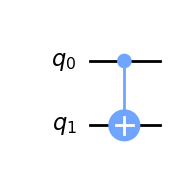

In [36]:
# Oracle gate - Identity 
i_oracle = QuantumCircuit(2, name='IdentityOracle')
i_oracle.cnot(0,1) 
i_oracle.draw('mpl')

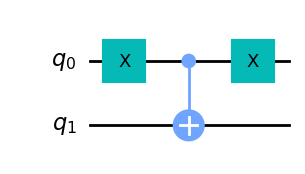

In [37]:
# Oracle gate - Not 
not_oracle = QuantumCircuit(2, name='NotOracle')
not_oracle.x(0) # begin wrapping the input
not_oracle.cnot(0,1)
not_oracle.x(0) # finish wrapping the input
not_oracle.draw('mpl')

### Constant Oracles

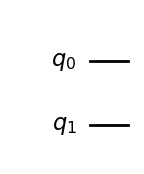

In [38]:
# Oracle gate - Zero 
one_oracle = QuantumCircuit(2, name='OneOracle')
one_oracle.draw('mpl')

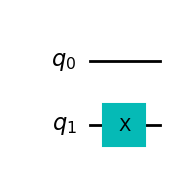

In [39]:
# Oracle gate - One 
zero_oracle = QuantumCircuit(2, name='ZeroOracle')
zero_oracle.x(1)
zero_oracle.draw('mpl')

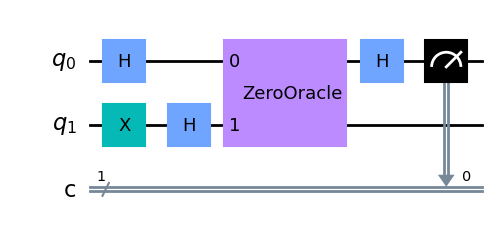

In [40]:
circuit = QuantumCircuit(2,1)

# prepare our initial state: |00> to |01> to |+>|->
circuit.x(1) 
circuit.h([0,1])

#Choose an oracle
oracle = zero_oracle.to_instruction()

circuit.append(oracle,[0,1])

# Hadamard and measure
circuit.h(0)
circuit.measure(0,0)
circuit.draw('mpl')

We can ignore the second qubit. 

After the Oracle, the first qubit `q0` will be in the state $\frac{1}{\sqrt{2}}(\ket{0} + (-1)^{f(0)\oplus f(1)}\ket{1})$.

The key insight is that the $\ket{1}$ term has a coefficient that can flip signs. If the result of $f(0) \oplus f(1)$ is 0, then the coefficient will be positive, otherwise it will be negative.

Considering when $f(0) \oplus f(1)$, we see that this is equal to 1 exclusively when $f(0) \ne f(1)$, i.e. when the function is balanced. This leads to the coefficient being negative.

By applying the Hadamard gate and then measuring, we  measure $\ket{1}$ if and only if the function is balanced.

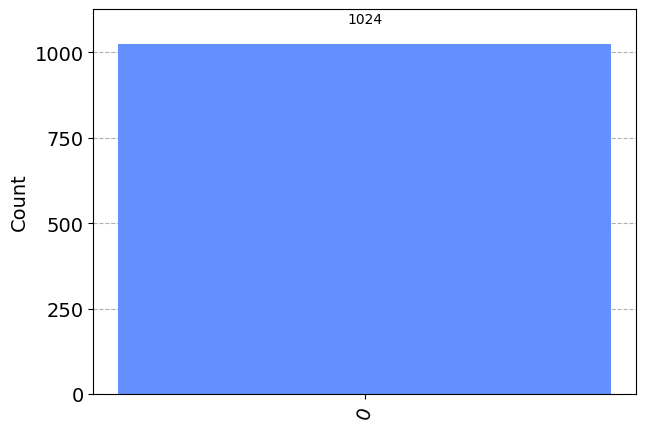

In [41]:
from qiskit.visualization import plot_histogram

backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuit, backend))
counts = job.result().get_counts()
plot_histogram(counts)